In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 加载数据
mnist = tf.keras.datasets.mnist
(train_image, train_label), (test_image, test_label) = mnist.load_data()

# 归一化
train_image, test_image = train_image / 255.0, test_image / 255.0
print("环境准备就绪！")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
环境准备就绪！


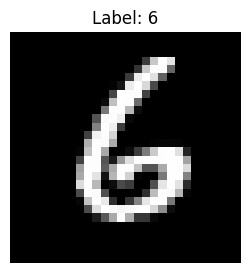

In [3]:
# --- 作业 1 ---
plt.figure(figsize=(3, 3))
plt.imshow(train_image[6000], cmap='gray')
plt.title(f"Label: {train_label[6000]}")
plt.axis('off')
plt.show()

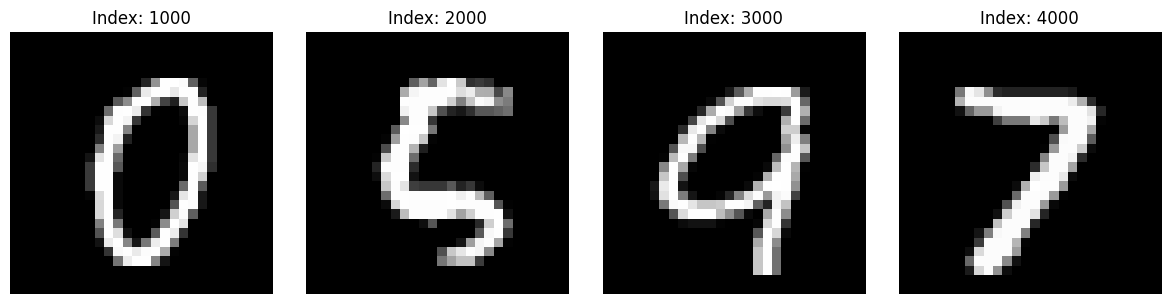

In [4]:
# --- 作业 2 ---
indices = [1000, 2000, 3000, 4000]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3))
axes = [ax1, ax2, ax3, ax4]

for i, ax in enumerate(axes):
    idx = indices[i]
    ax.imshow(train_image[idx], cmap='gray')
    ax.set_title(f"Index: {idx}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# --- 作业 3 & 4 ---
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),  # 修改点：128节点
    tf.keras.layers.Dense(10, activation='softmax')
])

# 编译模型：使用 SGD
model.compile(optimizer='sgd',  # 修改点：SGD
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 打印结构
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# --- 作业 5：训练模型 ---
history = model.fit(train_image, train_label, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7367 - loss: 1.0422
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9016 - loss: 0.3494
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9159 - loss: 0.2969
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9242 - loss: 0.2661
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9331 - loss: 0.2392


In [ ]:
'''  '''